In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score

### Read the dataset

In [2]:
df = pd.read_csv('adult.csv')
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.isnull().values.any()

False

### Let's work with categorical features

##### In previous step(data analysis ) we have decided that '?' present a useful information so it is a good idea to substitute it with a specific word which would denote it.

In [3]:
def replace_inter(df):
    df['workclass'] = df['workclass'].str.replace('?','unemployed')
    df['occupation'] = df['occupation'].str.replace('?','no_occupation')
    df['native.country'] = df['native.country'].str.replace('?','unknown')
    return df
df = replace_inter(df)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,unemployed,77053,HS-grad,9,Widowed,no_occupation,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,unemployed,186061,Some-college,10,Widowed,no_occupation,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Now lets work with other categorical features, one way it to apply one hote encoder algorithm (dummy variables) but it will increase considerable the dimesionality of my data set , therefore lets apply binary encoder algorithm for columns with more than 3 unique samples.

In [4]:
def get_function(df,column_list):
    for i in column_list:
        rep = len(df[i].unique())
        if rep > 3:
            print('For column ',i,' we will apply binary encoder')
        else:
            print('For column ',i,' we will apply a map function')
lista = ['race','sex','income','workclass','occupation','native.country','relationship','marital.status','education']
get_function(df,lista)

For column  race  we will apply binary encoder
For column  sex  we will apply a map function
For column  income  we will apply a map function
For column  workclass  we will apply binary encoder
For column  occupation  we will apply binary encoder
For column  native.country  we will apply binary encoder
For column  relationship  we will apply binary encoder
For column  marital.status  we will apply binary encoder
For column  education  we will apply binary encoder


## Now lets apply the function described above

In [5]:
import category_encoders as ce

In [6]:
li1 = []
def binary_encoder(df,column_list):
    for i in column_list:
        rep = len(df[i].unique())
        if rep > 3:
            li1.append(i)
    encoder = ce.BinaryEncoder(cols=li1, return_df = True)
    df = encoder.fit_transform(df)
    return df

df = binary_encoder(df,lista)

In [7]:
df

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital.gain,capital.loss,hours.per.week,native.country_0,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,income
0,90,0,0,0,1,77053,0,0,0,0,...,0,4356,40,0,0,0,0,0,1,<=50K
1,82,0,0,1,0,132870,0,0,0,0,...,0,4356,18,0,0,0,0,0,1,<=50K
2,66,0,0,0,1,186061,0,0,0,1,...,0,4356,40,0,0,0,0,0,1,<=50K
3,54,0,0,1,0,140359,0,0,0,1,...,0,3900,40,0,0,0,0,0,1,<=50K
4,41,0,0,1,0,264663,0,0,0,1,...,0,3900,40,0,0,0,0,0,1,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,0,1,0,310152,0,0,0,1,...,0,0,40,0,0,0,0,0,1,<=50K
32557,27,0,0,1,0,257302,0,1,0,1,...,0,0,38,0,0,0,0,0,1,<=50K
32558,40,0,0,1,0,154374,0,0,0,0,...,0,0,40,0,0,0,0,0,1,>50K
32559,58,0,0,1,0,151910,0,0,0,0,...,0,0,40,0,0,0,0,0,1,<=50K


In [8]:
def map_binar(df):
    df['income'] = df['income'].map({'<=50K' : 0, '>50K' : 1})
    df['sex'] = df['sex'].map({'Female' : 0, 'Male' : 1})
    return df
df = map_binar(df)
df

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital.gain,capital.loss,hours.per.week,native.country_0,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,income
0,90,0,0,0,1,77053,0,0,0,0,...,0,4356,40,0,0,0,0,0,1,0
1,82,0,0,1,0,132870,0,0,0,0,...,0,4356,18,0,0,0,0,0,1,0
2,66,0,0,0,1,186061,0,0,0,1,...,0,4356,40,0,0,0,0,0,1,0
3,54,0,0,1,0,140359,0,0,0,1,...,0,3900,40,0,0,0,0,0,1,0
4,41,0,0,1,0,264663,0,0,0,1,...,0,3900,40,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,0,1,0,310152,0,0,0,1,...,0,0,40,0,0,0,0,0,1,0
32557,27,0,0,1,0,257302,0,1,0,1,...,0,0,38,0,0,0,0,0,1,0
32558,40,0,0,1,0,154374,0,0,0,0,...,0,0,40,0,0,0,0,0,1,1
32559,58,0,0,1,0,151910,0,0,0,0,...,0,0,40,0,0,0,0,0,1,0


In [9]:
df.columns

Index(['age', 'workclass_0', 'workclass_1', 'workclass_2', 'workclass_3',
       'fnlwgt', 'education_0', 'education_1', 'education_2', 'education_3',
       'education_4', 'education.num', 'marital.status_0', 'marital.status_1',
       'marital.status_2', 'occupation_0', 'occupation_1', 'occupation_2',
       'occupation_3', 'relationship_0', 'relationship_1', 'relationship_2',
       'race_0', 'race_1', 'race_2', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country_0', 'native.country_1',
       'native.country_2', 'native.country_3', 'native.country_4',
       'native.country_5', 'income'],
      dtype='object')

# In the previous file(data_analysis) we have seen that our dataset is not balanced so lets fix this problem!

In [17]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital.gain,capital.loss,hours.per.week,native.country_0,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,income
0,51,0,0,1,0,199688,0,0,0,1,...,0,0,45,0,0,0,0,0,1,0
1,22,0,0,1,0,106843,0,0,1,0,...,0,0,30,0,0,0,0,0,1,0
2,55,0,0,1,0,463072,0,0,1,1,...,0,0,60,0,0,0,0,0,1,1
3,35,0,0,1,0,142874,0,1,0,1,...,0,0,36,0,0,0,0,0,1,0
4,36,0,0,1,0,231052,0,0,0,0,...,0,0,35,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,34,0,0,1,0,78477,0,0,0,0,...,0,0,54,0,0,0,0,0,1,1
37182,50,0,0,1,0,159180,0,0,0,0,...,0,2149,40,0,0,0,0,0,1,1
37183,45,0,0,1,0,303074,0,0,1,1,...,0,0,50,0,0,0,0,0,1,1
37184,41,0,0,1,0,111485,0,0,1,1,...,0,0,50,0,0,0,0,0,1,1


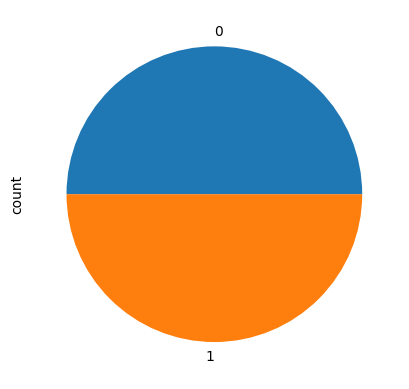

In [18]:
def get_smotenc(df,target,num):
    X = df.drop(target, axis=1)
    Y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 12, test_size=0.25)
    sm = SMOTENC(random_state=42, categorical_features=[num])
    X_res, y_ress = sm.fit_resample(X_train,y_train)
    y_ress.value_counts().plot.pie()
    df_balanced = pd.concat([X_res, y_ress], axis = 1)
    return df_balanced
df = get_smotenc(df,'income',34)
df

### Now lets apply some dimensionality reduction algorithm

In [19]:
from sklearn.decomposition import PCA
from kydavra import ICAReducer

## PCA

In [20]:
def PCA_2(df,n_comp,target):
    X = df.drop(target, axis = 1)
    Y = df[target]
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    pca_df = pca.transform(X)
    pca_df = pd.DataFrame(pca_df)
    pca_df[target] = Y
    return pca_df

pca_df = PCA_2(df,30,'income')

In [18]:
pca_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,income
0,9633.830180,-2016.659255,-122.538822,11.787700,-0.387440,0.502129,-0.635629,-0.731687,-0.229672,0.576108,...,0.124579,-0.011967,-0.008561,-0.052265,-0.019416,-0.012433,-0.001441,0.001815,-0.000139,0
1,-83211.154301,-2069.583831,-127.490066,-21.480954,-4.983827,3.846217,-0.486259,0.173223,-0.177191,-0.116054,...,-0.412098,-0.989415,-0.333646,-0.144656,-0.078644,0.048281,0.270605,0.079944,-0.006109,0
2,273017.786969,-1866.532067,-108.663613,23.010548,11.799657,-2.153428,-0.153690,0.600504,0.427330,-0.267803,...,-0.081000,0.071189,-0.045274,-0.064980,-0.028333,0.011314,0.034465,0.020524,0.005528,1
3,-47180.160344,-2049.044718,-125.563814,-6.813077,-3.488554,-1.814153,1.077599,-0.962650,-0.054894,0.687871,...,-0.309134,0.504981,-0.070469,-0.765041,0.062869,-0.070274,-0.221621,-0.062560,-0.048590,0
4,40997.825199,-1998.784562,-120.931150,-5.389680,-5.115287,1.185497,1.264766,0.524186,-0.417895,-1.133876,...,-0.274852,0.294810,0.215328,0.095639,-0.067396,-0.094681,-0.360197,-0.043271,-0.050868,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,-111577.149788,-2085.748590,-128.920370,-2.543102,13.961980,1.785485,-0.217832,-0.697030,-0.340107,-0.876951,...,0.085405,-0.240534,-0.065965,0.022311,-0.055304,-0.023544,-0.103511,0.001112,-0.009072,1
37182,-30874.273294,-2044.628564,2024.310807,4.518824,-7.085157,1.314694,0.010385,-0.773306,-0.130603,-0.859449,...,0.112873,-0.267011,-0.060693,-0.026392,-0.045591,-0.031819,-0.107912,0.001444,-0.010278,1
37183,113019.813294,-1957.730610,-117.104597,8.784987,6.072574,-2.441103,-0.582051,-0.439632,0.857883,0.040130,...,-0.050138,0.017862,0.002330,-0.029472,-0.017075,0.010043,0.023766,0.009484,0.004962,1
37184,-78569.155268,-2066.934098,-127.179953,3.133937,7.914893,-2.432699,0.880673,0.297750,-0.218346,0.276499,...,-0.184538,0.158092,0.003670,-0.110009,-0.011501,-0.006369,-0.054989,-0.004534,-0.005076,1


## ICAReducer


In [19]:
def ICAReducer_2(df,target):
    icar = ICAReducer(min_corr=0.4, max_corr=0.7)
    df_icar = icar.reduce(df,target)
    return df_icar

df_icar = ICAReducer_2(df,'income')
df_icar



,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital.gain,capital.loss,hours.per.week,native.country_0,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,income
0,51,0,0,1,0,199688,0,0,0,1,...,0,0,45,0,0,0,0,0,1,0
1,22,0,0,1,0,106843,0,0,1,0,...,0,0,30,0,0,0,0,0,1,0
2,55,0,0,1,0,463072,0,0,1,1,...,0,0,60,0,0,0,0,0,1,1
3,35,0,0,1,0,142874,0,1,0,1,...,0,0,36,0,0,0,0,0,1,0
4,36,0,0,1,0,231052,0,0,0,0,...,0,0,35,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,34,0,0,1,0,78477,0,0,0,0,...,0,0,54,0,0,0,0,0,1,1
37182,50,0,0,1,0,159180,0,0,0,0,...,0,2149,40,0,0,0,0,0,1,1
37183,45,0,0,1,0,303074,0,0,1,1,...,0,0,50,0,0,0,0,0,1,1
37184,41,0,0,1,0,111485,0,0,1,1,...,0,0,50,0,0,0,0,0,1,1


#### Since IcarReducer finds high correlated clumns it didn't reduce dataset, in previous file(data_analysis) we have found that our dataset doesn't have high correlated columns

## Lets begin the feature selection 
#### Apply the following algorithms
##### PValueSelector/JensenShannonSelector/BregmanDivergenceSelector

In [20]:
from kydavra import PValueSelector
from kydavra import BregmanDivergenceSelector
from kydavra import JensenShannonSelector

In [21]:
def get_PValue(df,target):
    pvalue_selector = PValueSelector()
    selected_columns = pvalue_selector.select(df,target)
    return selected_columns
    
selected_columns = get_PValue(df,'income')
selected_columns

['age',
 'workclass_2',
 'workclass_3',
 'fnlwgt',
 'education_1',
 'education_2',
 'education_3',
 'education_4',
 'education.num',
 'marital.status_0',
 'marital.status_1',
 'marital.status_2',
 'occupation_0',
 'occupation_1',
 'occupation_2',
 'occupation_3',
 'relationship_0',
 'relationship_1',
 'relationship_2',
 'race_0',
 'race_1',
 'race_2',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country_1',
 'native.country_4',
 'native.country_5']

In [22]:
def get_jensen(df,target):
    jensen = JensenShannonSelector()
    cols0 = jensen.select(df,target)
    return cols0

cols0 = get_jensen(df,'income')
cols0

['age',
 'workclass_2',
 'fnlwgt',
 'education_2',
 'education_3',
 'education_4',
 'education.num',
 'marital.status_0',
 'marital.status_2',
 'occupation_1',
 'occupation_2',
 'relationship_0',
 'relationship_2',
 'race_2',
 'sex',
 'capital.gain',
 'hours.per.week',
 'native.country_5']

In [23]:
def get_Bregman(df,target):
    cols = BregmanDivergenceSelector().select(df,target)
    return cols

cols = get_Bregman(df,'income')
cols

['workclass_0',
 'workclass_1',
 'workclass_2',
 'workclass_3',
 'education_0',
 'education_1',
 'education_2',
 'education_3',
 'education_4',
 'marital.status_0',
 'marital.status_1',
 'marital.status_2',
 'occupation_0',
 'occupation_1',
 'occupation_2',
 'occupation_3',
 'relationship_0',
 'relationship_1',
 'relationship_2',
 'race_0',
 'race_1',
 'race_2',
 'sex',
 'native.country_0',
 'native.country_1',
 'native.country_2',
 'native.country_3',
 'native.country_4',
 'native.country_5']

In [24]:
dic = {
    'PValueSelector': selected_columns[:17],
    'JensenShannonSelector' : cols0[:17],
    'BregmanDivergenceSelector':cols[:17]
}

Feature_selection = pd.DataFrame(dic)
Feature_selection

,PValueSelector,JensenShannonSelector,BregmanDivergenceSelector
0,age,age,workclass_0
1,workclass_2,workclass_2,workclass_1
2,workclass_3,fnlwgt,workclass_2
3,fnlwgt,education_2,workclass_3
4,education_1,education_3,education_0
5,education_2,education_4,education_1
6,education_3,education.num,education_2
7,education_4,marital.status_0,education_3
8,education.num,marital.status_2,education_4
9,marital.status_0,occupation_1,marital.status_0


### According to all our feature selection algorithms the most valuable columns are: [age,workclass,education,ocupation,relatioship]

In [25]:
dicc = {
    'PValueSelector': selected_columns[:27],
    'BregmanDivergenceSelector':cols[:27]
}
Feature_selection2 = pd.DataFrame(dicc)
Feature_selection2

,PValueSelector,BregmanDivergenceSelector
0,age,workclass_0
1,workclass_2,workclass_1
2,workclass_3,workclass_2
3,fnlwgt,workclass_3
4,education_1,education_0
5,education_2,education_1
6,education_3,education_2
7,education_4,education_3
8,education.num,education_4
9,marital.status_0,marital.status_0


### Dropping JensenShannonSelector algorithm we can see that the size of dataset increased and we have an additional valuable column ,, native.country,,

### An additional method to visualise the P-Value of each column

In [26]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = df.drop('income', axis =1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_sm = sm.add_constant(X_train)
X_train_sm
view = sm.OLS(y_train,X_train_sm).fit()
print(view.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     818.4
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:04:13   Log-Likelihood:                -8538.8
No. Observations:               24914   AIC:                         1.715e+04
Df Residuals:                   24878   BIC:                         1.744e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4339      0.029  

#### Notes: A P-Value < or = 0.05 is considered statistically significant. It denotes strong evidence against the null hypothesis[

#### Now the dataset is balanced

## Outliers Detection

### The algorithms which are going to be applied :

In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor


In [28]:
def get_IsolationForest(df, target):
    df_IsolationForest = df.copy()
    model=IsolationForest()
    # Apply algorithm to data
    df_IsolationForest['outlier']=pd.Series(model.fit_predict(df_IsolationForest.values))
    # Remove rows where there is -1 in created column
    df_IsolationForest=df_IsolationForest[df_IsolationForest.outlier!=-1]
    # Drop created column
    df_IsolationForest.drop(['outlier'], axis=1, inplace=True)
    return df_IsolationForest

df_IsolationForest = get_IsolationForest(df,'income')
df_IsolationForest

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital.gain,capital.loss,hours.per.week,native.country_0,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,income
0,51,0,0,1,0,199688,0,0,0,1,...,0,0,45,0,0,0,0,0,1,0
2,55,0,0,1,0,463072,0,0,1,1,...,0,0,60,0,0,0,0,0,1,1
8,68,0,0,1,0,339168,0,0,1,1,...,0,0,30,0,0,0,0,0,1,0
9,37,0,0,1,0,40955,0,0,1,1,...,0,0,30,0,0,0,0,0,1,0
11,45,0,1,1,1,215862,0,0,1,0,...,7688,0,45,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,34,0,0,1,0,78477,0,0,0,0,...,0,0,54,0,0,0,0,0,1,1
37182,50,0,0,1,0,159180,0,0,0,0,...,0,2149,40,0,0,0,0,0,1,1
37183,45,0,0,1,0,303074,0,0,1,1,...,0,0,50,0,0,0,0,0,1,1
37184,41,0,0,1,0,111485,0,0,1,1,...,0,0,50,0,0,0,0,0,1,1


#### Apply the same algorithm as in data_analysis to find the percentage of outliers

In [29]:
for m in ['age','education.num','capital.gain','capital.loss','hours.per.week']:
    Q1 = df_IsolationForest[m].quantile(0.25)
    Q3 = df_IsolationForest[m].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outliers = df_IsolationForest[(df_IsolationForest[m] < Q1 - threshold) | (df_IsolationForest[m] > Q3 + threshold)]
    outlier_count = len(outliers)
    total_count = len(df_IsolationForest[m])
    percentage_of_outliers = (outlier_count / total_count) * 100
    print(m, '-',percentage_of_outliers)

age - 0.47047492035267097
education.num - 0.048158850114840335
capital.gain - 13.2807290509002
capital.loss - 6.271764095724976
hours.per.week - 9.36504408387049


In [30]:
def get_EllipticEnvelope(df,target):
    df_EllipticEnvelope = df.copy()
    model=EllipticEnvelope()
    df_EllipticEnvelope['outlier']=pd.Series(model.fit_predict(df.values))
    df_EllipticEnvelope=df_EllipticEnvelope[df_EllipticEnvelope.outlier!=-1]
    df_EllipticEnvelope.drop(['outlier'], axis=1, inplace=True)
    return df_EllipticEnvelope

df_EllipticEnvelope = get_EllipticEnvelope(df,'income')
df_EllipticEnvelope

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital.gain,capital.loss,hours.per.week,native.country_0,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,income
0,51,0,0,1,0,199688,0,0,0,1,...,0,0,45,0,0,0,0,0,1,0
2,55,0,0,1,0,463072,0,0,1,1,...,0,0,60,0,0,0,0,0,1,1
3,35,0,0,1,0,142874,0,1,0,1,...,0,0,36,0,0,0,0,0,1,0
4,36,0,0,1,0,231052,0,0,0,0,...,0,0,35,0,0,0,0,0,1,0
5,28,0,0,1,0,103389,0,1,0,0,...,0,0,40,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37180,72,0,0,1,0,113884,0,0,0,0,...,0,0,24,0,0,0,0,0,1,1
37181,34,0,0,1,0,78477,0,0,0,0,...,0,0,54,0,0,0,0,0,1,1
37183,45,0,0,1,0,303074,0,0,1,1,...,0,0,50,0,0,0,0,0,1,1
37184,41,0,0,1,0,111485,0,0,1,1,...,0,0,50,0,0,0,0,0,1,1


In [31]:
for m in ['age','education.num','capital.gain','capital.loss','hours.per.week']:
    Q1 = df_EllipticEnvelope[m].quantile(0.25)
    Q3 = df_EllipticEnvelope[m].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outliers = df_EllipticEnvelope[(df_EllipticEnvelope[m] < Q1 - threshold) | (df_EllipticEnvelope[m] > Q3 + threshold)]
    outlier_count = len(outliers)
    total_count = len(df_EllipticEnvelope[m])
    percentage_of_outliers = (outlier_count / total_count) * 100
    print(m, '-',percentage_of_outliers)

age - 0.7111482953357038
education.num - 0.40039441838228707
capital.gain - 12.872381749185765
capital.loss - 0.020916126333403055
hours.per.week - 16.89425404129441


In [32]:
def get_LocalOutlierFactor(df,target):
    df_LocalOutlierFactor = df.copy()
    model=LocalOutlierFactor()
    df_LocalOutlierFactor['outlier']=pd.Series(model.fit_predict(df.values))
    df_LocalOutlierFactor=df_LocalOutlierFactor[df_LocalOutlierFactor.outlier!=-1]
    df_LocalOutlierFactor.drop(['outlier'], axis=1, inplace=True)
    return df_LocalOutlierFactor

df_LocalOutlierFactor = get_LocalOutlierFactor(df,'income')
df_LocalOutlierFactor


,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital.gain,capital.loss,hours.per.week,native.country_0,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,income
0,51,0,0,1,0,199688,0,0,0,1,...,0,0,45,0,0,0,0,0,1,0
1,22,0,0,1,0,106843,0,0,1,0,...,0,0,30,0,0,0,0,0,1,0
2,55,0,0,1,0,463072,0,0,1,1,...,0,0,60,0,0,0,0,0,1,1
4,36,0,0,1,0,231052,0,0,0,0,...,0,0,35,0,0,0,0,0,1,0
5,28,0,0,1,0,103389,0,1,0,0,...,0,0,40,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,34,0,0,1,0,78477,0,0,0,0,...,0,0,54,0,0,0,0,0,1,1
37182,50,0,0,1,0,159180,0,0,0,0,...,0,2149,40,0,0,0,0,0,1,1
37183,45,0,0,1,0,303074,0,0,1,1,...,0,0,50,0,0,0,0,0,1,1
37184,41,0,0,1,0,111485,0,0,1,1,...,0,0,50,0,0,0,0,0,1,1


In [847]:
for m in ['age','education.num','capital.gain','capital.loss','hours.per.week']:
    Q1 = df_LocalOutlierFactor[m].quantile(0.25)
    Q3 = df_LocalOutlierFactor[m].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outliers = df_LocalOutlierFactor[(df_LocalOutlierFactor[m] < Q1 - threshold) | (df_LocalOutlierFactor[m] > Q3 + threshold)]
    outlier_count = len(outliers)
    total_count = len(df_LocalOutlierFactor[m])
    percentage_of_outliers = (outlier_count / total_count) * 100
    print(m, '-',percentage_of_outliers)

age - 0.6837002328117172
education.num - 0.4449945480800401
capital.gain - 10.897945952317803
capital.loss - 5.160168567471193
hours.per.week - 12.775174608787907


In [916]:
# methods : IsolationForest,LocalOutlierFactor, EllipticEnvelope
def find_outliers(df,target,method):
    df_outliers = df.copy()
    model=method()
    df_outliers['outlier']=pd.Series(model.fit_predict(df.values))
    df_outliers=df_outliers[df_outliers.outlier!=-1]
    df_outliers.drop(['outlier'], axis=1, inplace=True)
    return df_outliers

df_outliers = find_outliers(df,'income',IsolationForest)

In [917]:
df_outliers

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital.gain,capital.loss,hours.per.week,native.country_0,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,income
0,43,0,0,1,0,190786,0,0,0,0,...,0,0,40,0,0,0,0,0,1,1
4,34,0,0,1,0,110978,0,0,1,1,...,0,0,40,0,0,0,0,0,1,0
5,30,0,0,1,0,89735,0,0,0,0,...,0,1504,40,0,0,0,0,0,1,0
6,66,0,1,1,0,102663,0,0,0,1,...,0,0,50,0,0,0,0,0,1,0
7,62,0,0,1,0,208711,0,0,1,1,...,7688,0,50,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36399,52,0,0,1,0,222259,0,0,0,0,...,0,0,40,0,0,0,0,0,1,1
36400,45,0,0,1,0,160440,0,0,0,0,...,0,0,36,0,0,0,0,0,1,1
36401,45,0,0,1,0,164890,0,0,0,1,...,0,0,44,0,0,0,0,0,1,1
36402,25,0,0,1,0,160992,0,0,1,1,...,5178,0,40,0,0,0,0,0,1,1


### According to the result above IsolationForest algorithm has the best result since it is capable to identify outliers in non-linear data distributions.

## Now lets apply some models and find their accuracy score to determine the best one. (Apply hyperparameter tuning for some models)

In [918]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [920]:
from sklearn.model_selection import GridSearchCV


### Create 2 functions that will take my dataset and model.name as input and will return the accuracy score of the model for different cases.

In [921]:
from sklearn.metrics import r2_score
lista = []
lista1 = []
lista2 = []
lista3 = []
lista4 = []
lista5 = []
lista6 = []
lista7 = []
lista8 = []
def apply_model(df,model):
    X = df.drop('income', axis = 1)
    Y = df['income']

    scaler = StandardScaler()

    # Fit the scaler on the column data
    scaler.fit(X)

    # Apply standardization to the column
    X = scaler.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 12)
    if isinstance(model, LogisticRegression):
        tuned_parameters = {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
        }
        clf = GridSearchCV(LogisticRegression(), tuned_parameters,scoring='recall')
        clf.fit(X_train, y_train)
        output69 = clf.predict(X_test)
        f1 = accuracy_score(y_test,output69)
        lista.append(f1)
    elif isinstance(model, DecisionTreeClassifier):
        tuned_parameters = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'splitter': ['best','random'],
        'max_features': ['log2', 'sqrt',int,float,'auto']
        }
        clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters,scoring='recall')
        clf.fit(X_train, y_train)
        output69 = clf.predict(X_test)
        f1 = accuracy_score(y_test,output69)
        lista1.append(f1)
    elif isinstance(model, RandomForestClassifier):
        tuned_parameters = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_features': ['log2', 'sqrt',None],
        'class_weight' :['balanced', 'balanced_subsample']
        }
        clf = GridSearchCV(RandomForestClassifier(), tuned_parameters,scoring='recall')
        clf.fit(X_train, y_train)
        output69 = clf.predict(X_test)
        f1 = accuracy_score(y_test,output69)
        lista2.append(f1)
    elif isinstance(model, KNeighborsClassifier):
        tuned_parameters = {
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
        clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters,scoring='recall')
        clf.fit(X_train, y_train)
        output69 = clf.predict(X_test)
        f1 = accuracy_score(y_test,output69)
        lista3.append(f1)
    elif isinstance(model, SVC):
        clf = SVC()
        clf.fit(X_train, y_train)
        output69 = clf.predict(X_test)
        f1 = accuracy_score(y_test,output69)
        lista4.append(f1)
    elif isinstance(model, GaussianNB):
        clf = GaussianNB()
        clf.fit(X_train, y_train)
        output69 = clf.predict(X_test)
        f1 = accuracy_score(y_test,output69)
        lista5.append(f1)
    elif isinstance(model, AdaBoostClassifier):
        tuned_parameters = {
        'algorithm':['SAMME', 'SAMME.R']
        }
        clf = GridSearchCV(AdaBoostClassifier(), tuned_parameters,scoring='recall')
        clf.fit(X_train, y_train)
        output69 = clf.predict(X_test)
        f1 = accuracy_score(y_test,output69)
        lista6.append(f1)
    elif isinstance(model, QuadraticDiscriminantAnalysis):
        clf = QuadraticDiscriminantAnalysis()
        clf.fit(X_train, y_train)
        output69 = clf.predict(X_test)
        f1 = accuracy_score(y_test,output69)
        lista7.append(f1)
    elif isinstance(model, MLPClassifier):
        tuned_parameters = {
        'activation':['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'learning_rate':['constant', 'invscaling', 'adaptive']
        }
        clf = GridSearchCV(MLPClassifier(), tuned_parameters,scoring='recall')
        clf.fit(X_train, y_train)
        output69 = clf.predict(X_test)
        f1 = accuracy_score(y_test,output69)
        lista8.append(f1)
    print(f1)

In [922]:
def fun1(model):
    print("Simple df")
    apply_model(df,model)
    print("PCA dataframe")
    apply_model(pca_df,model)
    print("Isolation Forest dataframe")
    apply_model(df_IsolationForest,model)
    print("EllipticEnvelope dataframe")
    apply_model(df_EllipticEnvelope,model)
    print("LocalOutlierFactor dataframe")
    apply_model(df_LocalOutlierFactor,model)

In [923]:
fun1(LogisticRegression())

Simple df
0.8680364795077464
PCA dataframe
0.8680364795077464
Isolation Forest dataframe
0.8726357535082367
EllipticEnvelope dataframe
0.8675375412037603
LocalOutlierFactor dataframe
0.8644507307873645


In [924]:
fun1(DecisionTreeClassifier())

Simple df
0.8507856279529722
PCA dataframe
0.837160751565762
Isolation Forest dataframe
0.8512812690665039
EllipticEnvelope dataframe
0.8470272250030522
LocalOutlierFactor dataframe
0.851013672795851


In [925]:
fun1(RandomForestClassifier())

Simple df
0.8978134270959235
PCA dataframe
0.8905614767607956
Isolation Forest dataframe
0.8942953020134228
EllipticEnvelope dataframe
0.8902453912831156
LocalOutlierFactor dataframe
0.8892032060348892


In [926]:
fun1(KNeighborsClassifier())

Simple df
0.8674870893308427
PCA dataframe
0.8692451378969344
Isolation Forest dataframe
0.87614399023795
EllipticEnvelope dataframe
0.8670492003418386
LocalOutlierFactor dataframe
0.8640971239981141


In [927]:
fun1(SVC())

Simple df
0.8911108669376991
PCA dataframe
0.8910009889023184
Isolation Forest dataframe
0.8929225137278829
EllipticEnvelope dataframe
0.8860944939567819
LocalOutlierFactor dataframe
0.8881423856671381


In [928]:
fun1(GaussianNB())

Simple df
0.6003735853202945
PCA dataframe
0.7993627073947918
Isolation Forest dataframe
0.7332214765100671
EllipticEnvelope dataframe
0.5874740568917104
LocalOutlierFactor dataframe
0.617043847241867


In [929]:
fun1(AdaBoostClassifier())

Simple df
0.8816613558949566
PCA dataframe
0.8655092846939897
Isolation Forest dataframe
0.8823978035387431
EllipticEnvelope dataframe
0.8722988646074961
LocalOutlierFactor dataframe
0.879066478076379


In [930]:
fun1(QuadraticDiscriminantAnalysis())

Simple df
0.5364245687287111
PCA dataframe
0.8500164817053071
Isolation Forest dataframe
0.6308724832214765
EllipticEnvelope dataframe
0.5285068978146746
LocalOutlierFactor dataframe
0.5453795379537953


In [931]:
fun1(MLPClassifier())

Simple df
0.878694648939677
PCA dataframe
0.8845181848148556
Isolation Forest dataframe
0.5846552776082977
EllipticEnvelope dataframe
0.8879257721889879
LocalOutlierFactor dataframe
0.8843705799151343


In [932]:
print(len(lista))
print(len(lista1))
print(len(lista2))
print(len(lista3))
print(len(lista4))
print(len(lista5))
print(len(lista6))
print(len(lista7))
print(len(lista8))

5
5
5
5
5
5
5
5
5


In [933]:
dic = {
    'Index' : ['Simple df','PCA','Isolation Forest','EllipticEnvelope','LocalOutlierFactor'],
    'LogisticRegression' : lista,
    'DecisionTreeClassifier' : lista1,
    'RandomForestClassifier' : lista2,
    'KNeighborsClassifier' : lista3,
    'SVC' : lista4,
    'GaussianNB' : lista5,
    'AdaBoostClassifier' : lista6,
    'QuadraticDiscriminantAnalysis' : lista7,
    'MLPClassifier' : lista8
    
}
dfff = pd.DataFrame(dic)
dfff.set_index('Index',inplace=True)
dfff

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,SVC,GaussianNB,AdaBoostClassifier,QuadraticDiscriminantAnalysis,MLPClassifier
Index,,,,,,,,,
Simple df,0.868036,0.850786,0.897813,0.867487,0.891111,0.600374,0.881661,0.536425,0.878695
PCA,0.868036,0.837161,0.890561,0.869245,0.891001,0.799363,0.865509,0.850016,0.884518
Isolation Forest,0.872636,0.851281,0.894295,0.876144,0.892923,0.733221,0.882398,0.630872,0.584655
EllipticEnvelope,0.867538,0.847027,0.890245,0.867049,0.886094,0.587474,0.872299,0.528507,0.887926
LocalOutlierFactor,0.864451,0.851014,0.889203,0.864097,0.888142,0.617044,0.879066,0.545380,0.884371


In [934]:
import seaborn as sns

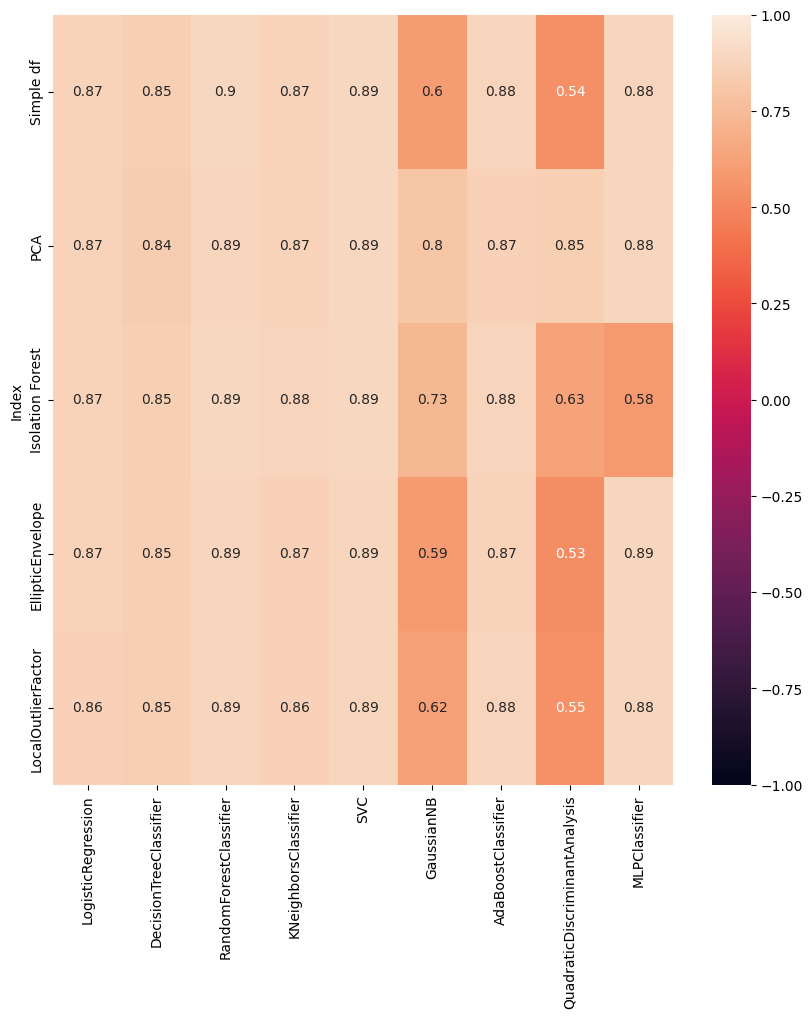

In [935]:
fig, ax = plt.subplots(figsize=(10,10)) 
heatmap = sns.heatmap(dfff, vmin=-1, vmax=1, annot=True)

### According to our results the best models are SVC and RandomForest  since RandomForest capture non-linear relationships between features and the target variable, also it combines multiple decision trees to make predictions. Each tree is trained on a different subset of the data, using a random subset of features.  Related to SVC it also performs well in high-dimensional spaces and  is capable of capturing complex non-linear relationships between features and the target variable.

### As a general conclusion, I am very thankful to the Sigmoid team, especially to Eduard who was my mentor, since it showed that each question has an answer and each problem has a solution. Thanks to your teachings, I feel more confident in my abilities and excited to explore the fascinating world of machine learning further. 